In [5]:
import numpy as np
import numpy
from numpy.linalg import inv

In [6]:
#create MDP environment
class Environment():
    """
    members: - state set S, 
             - action set A, 
             - w, discount factor, 
              - reward function
             - transition probability matrix PU(100*100), PD(100*100), PL(100*100), PR(100*100).
    """    
    def __init__(self, w, disc):
        self.w = w
        self.disc = disc
        #state set
        self.S = numpy.zeros(shape=(10,10))
        self.S = [[(0.0 + 10.0 * i) for i in range(10)],
                  [(1.0 + 10.0 * i) for i in range(10)],
                  [(2.0 + 10.0 * i) for i in range(10)],
                  [(3.0 + 10.0 * i) for i in range(10)],
                  [(4.0 + 10.0 * i) for i in range(10)],
                  [(5.0 + 10.0 * i) for i in range(10)],
                  [(6.0 + 10.0 * i) for i in range(10)],
                  [(7.0 + 10.0 * i) for i in range(10)],
                  [(8.0 + 10.0 * i) for i in range(10)],
                  [(9.0 + 10.0 * i) for i in range(10)]]

        #action set
        self.A = ['up', 'down', 'left', 'right']
        
        #Transition probability
        PU = numpy.zeros(shape=(100,100))#up transition probability
        PD = numpy.zeros(shape=(100,100))#down transition probability
        PL = numpy.zeros(shape=(100,100))#left transition probability
        PR = numpy.zeros(shape=(100,100))#right transition probability
        
        #row is state at time step t, column is state at time step t+1
        # for agent at edge states
        for i in range(1,9):
            PU[i][i] = 1 - self.w + self.w/4.0 #^
            PU[i][i-1] = self.w/4.0 #<
            PU[i][i+1] = self.w/4.0 #>
            PU[i][i+10] = self.w/4.0 #!
            PD[i][i] = self.w/4.0
            PD[i][i-1] = self.w/4.0
            PD[i][i+1] = self.w/4.0
            PD[i][i+10] = 1 - self.w + self.w/4.0
            PL[i][i] = self.w/4.0
            PL[i][i-1] = 1 - self.w + self.w/4.0
            PL[i][i+1] = self.w/4.0
            PL[i][i+10] = self.w/4.0
            PR[i][i] = self.w/4.0
            PR[i][i-1] = self.w/4.0
            PR[i][i+1] = 1 - self.w + self.w/4.0
            PR[i][i+10] = self.w/4.0
        for j in range(1,9):
            i = 10*j
            PU[i][i-10] = 1 - self.w + self.w/4.0 #^
            PU[i][i] = self.w/4.0 #<
            PU[i][i+1] = self.w/4.0 #>
            PU[i][i+10] = self.w/4.0 #!
            PD[i][i-10] = self.w/4.0
            PD[i][i] = self.w/4.0
            PD[i][i+1] = self.w/4.0
            PD[i][i+10] = 1 - self.w + self.w/4.0
            PL[i][i-10] = self.w/4.0
            PL[i][i] = 1 - self.w + self.w/4.0
            PL[i][i+1] = self.w/4.0
            PL[i][i+10] = self.w/4.0
            PR[i][i-10] = self.w/4.0
            PR[i][i] = self.w/4.0
            PR[i][i+1] = 1 - self.w + self.w/4.0
            PR[i][i+10] = self.w/4.0
        for k in range(1,9):
            i = 9 + k*10
            PU[i][i-10] = 1 - self.w + self.w/4.0 #^
            PU[i][i-1] = self.w/4.0 #<
            PU[i][i] = self.w/4.0 #>
            PU[i][i+10] = self.w/4.0 #!
            PD[i][i-10] = self.w/4.0
            PD[i][i-1] = self.w/4.0
            PD[i][i] = self.w/4.0
            PD[i][i+10] = 1 - self.w + self.w/4.0
            PL[i][i-10] = self.w/4.0
            PL[i][i-1] = 1 - self.w + self.w/4.0
            PL[i][i] = self.w/4.0
            PL[i][i+10] = self.w/4.0
            PR[i][i-10] = self.w/4.0
            PR[i][i-1] = self.w/4.0
            PR[i][i] = 1 - self.w + self.w/4.0
            PR[i][i+10] = self.w/4.0
        for n in range(1,9):
            i = 90 + n
            PU[i][i-10] = 1 - self.w + self.w/4.0 #^
            PU[i][i-1] = self.w/4.0 #<
            PU[i][i+1] = self.w/4.0 #>
            PU[i][i] = self.w/4.0 #!
            PD[i][i-10] = self.w/4.0
            PD[i][i-1] = self.w/4.0
            PD[i][i+1] = self.w/4.0
            PD[i][i] = 1 - self.w + self.w/4.0
            PL[i][i-10] = self.w/4.0
            PL[i][i-1] = 1 - self.w + self.w/4.0
            PL[i][i+1] = self.w/4.0
            PL[i][i] = self.w/4.0
            PR[i][i-10] = self.w/4.0
            PR[i][i-1] = self.w/4.0
            PR[i][i+1] = 1 - self.w + self.w/4.0
            PR[i][i] = self.w/4.0
        
            
        # for agent at corner states
        PU[0][0] = 1 - self.w + self.w/4.0 + self.w/4.0
        PU[0][1] = self.w/4.0
        PU[0][10] = self.w/4.0
        PD[0][0] = self.w/4.0+ self.w/4.0
        PD[0][1] = self.w/4.0
        PD[0][10] = 1 - self.w + self.w/4.0 
        PL[0][0] = 1 - self.w + self.w/4.0 + self.w/4.0
        PL[0][1] = self.w/4.0
        PL[0][10] = self.w/4.0
        PR[0][0] = self.w/4.0+ self.w/4.0
        PR[0][1] = 1 - self.w + self.w/4.0
        PR[0][10] = self.w/4.0
                
        PU[9][9] = 1 - self.w + self.w/4.0 + self.w/4.0
        PU[9][8] = self.w/4.0
        PU[9][19] = self.w/4.0        
        PD[9][9] = self.w/4.0 + self.w/4.0
        PD[9][8] = self.w/4.0
        PD[9][19] = 1 - self.w + self.w/4.0 
        PL[9][9] = self.w/4.0 + self.w/4.0
        PL[9][8] = 1 - self.w + self.w/4.0 
        PL[9][19] = self.w/4.0
        PR[9][9] = 1 - self.w + self.w/4.0 + self.w/4.0
        PR[9][8]= self.w/4.0
        PR[9][19] = self.w/4.0
           
        PU[90][90] = self.w/4.0 + self.w/4.0
        PU[90][80] = 1 - self.w + self.w/4.0 
        PU[90][91] = self.w/4.0            
        PD[90][90] = 1 - self.w + self.w/4.0 + self.w/4.0
        PD[90][80] = self.w/4.0
        PD[90][91] = self.w/4.0           
        PL[90][90] = 1 - self.w + self.w/4.0 + self.w/4.0
        PL[90][80] = self.w/4.0
        PL[90][91] = self.w/4.0           
        PR[90][90] = self.w/4.0 + self.w/4.0
        PR[90][80]= self.w/4.0
        PR[90][91] = 1 - self.w + self.w/4.0 
        
        PU[99][99] = self.w/4.0 + self.w/4.0
        PU[99][89] = 1 - self.w + self.w/4.0 
        PU[99][98] = self.w/4.0         
        PD[99][99] = 1 - self.w + self.w/4.0 + self.w/4.0
        PD[99][89] = self.w/4.0
        PD[99][98] = self.w/4.0           
        PL[99][99] = self.w/4.0 + self.w/4.0 
        PL[99][89] = self.w/4.0
        PL[99][98] = 1 - self.w + self.w/4.0           
        PR[99][99] = 1 - self.w + self.w/4.0 + self.w/4.0
        PR[99][89]= self.w/4.0
        PR[99][98] = self.w/4.0
        
        # for other states
        for m in range(1,9):
            for n in range(1,9):
                i = m*10 + n
                PU[i][i-10] = 1 - self.w + self.w/4.0 #^
                PU[i][i-1] = self.w/4.0 #<
                PU[i][i+1] = self.w/4.0 #>
                PU[i][i+10] = self.w/4.0 #!
                PD[i][i-10] = self.w/4.0
                PD[i][i-1] = self.w/4.0
                PD[i][i+1] = self.w/4.0
                PD[i][i+10] = 1 - self.w + self.w/4.0
                PL[i][i-10] = self.w/4.0
                PL[i][i-1] = 1 - self.w + self.w/4.0
                PL[i][i+1] = self.w/4.0
                PL[i][i+10] = self.w/4.0
                PR[i][i-10] = self.w/4.0
                PR[i][i-1] = self.w/4.0
                PR[i][i+1] = 1 - self.w + self.w/4.0
                PR[i][i+10] = self.w/4.0
        
        self.PU = PU
        self.PD = PD
        self.PL = PL
        self.PR = PR
        
        #reward function
        reward = [0]*100
        reward[14] = -100
        reward[15] = -100
        reward[16] = -100
        reward[24] = -100
        reward[26] = -100
        reward[34] = -100
        reward[36] = -100
        reward[37] = -100
        reward[38] = -100
        reward[44] = -100
        reward[48] = -100
        reward[54] = -100
        reward[58] = -100
        reward[64] = -100
        reward[68] = -100
        reward[76] = -100
        reward[77] = -100
        reward[78] = -100
        reward[86] = -100
        reward[-1] = 10
        
        self.reward = reward

In [7]:
from cvxopt import matrix, solvers

In [8]:
def irl(state_num, PU, PD, PL, PR , lambda_num, discount, Rmax, policy):
    """
    - state_num: number of state = 100;
    - PU, PD, PL, PR: four transition probability matrix 100*100;
    - lambda_num: adjustable pernalty coefficient;
    - discount: disc;
    - Rmax: max value in T_rewardf;
    - policy: policy function 10*10, values should be in [0, 1, 2, 3];
    
     should return the estimated reward function of ground truth reward function 1 or 2.
    
    """
    # change reward function dimension to 100*1
    policy = np.reshape(policy,(100,1))
    #print(policy[1])
    
    #action set
    A = [0, 1, 2, 3]
    
    # transfer four transition probability matrix to a three dimension probability tensor 
    P = [[[0]*100]*100]*4
    P[0] = PU
    P[1] = PD
    P[2] = PL
    P[3] = PR
    #P = np.asarray(P)
    #print(P[3][5])
    
    # a handle for numtiplication in P.
    def multiply(state, other_action):
        #print(state)
        #policy_action = policy[state][0]
        policy_action = int(policy[state])
        mul = - np.dot(P[policy_action][state] - P[other_action][state]
        ,inv(np.eye(state_num) - discount * P[policy_action]))
        #print(mul)
        return mul
    
    # D inclusing following parts: [D00 D01 D02]
    #                              [D10 D11 D12]
    #                              [D20 D21 D22]
    #                              [D30 D31 D32]
    #                              [D40 D41 D42]
    #                              [D50 D51 D52]
    
    #D00 (300*100)
    D00 = np.vstack([multiply(s, a)] for s in range(100) for a in [element for element in A if element!=policy[s][0]])
    D01 = np.eye(300, 100)
    D02 = np.zeros((300, 100))
    #D03 = np.zeros((300, 100))
    
    D0 = np.hstack((D00, D01, D02))
    
    
    D10 = np.vstack([multiply(s, a)] for s in range(100) for a in [element for element in A if element!=policy[s][0]])    
    D11 = np.zeros((300, 100))
    D12 = np.zeros((300, 100))
    #D13 = np.zeros((300, 100))
    
    D1 = np.hstack((D10, D11, D12))
    
    D20 = np.eye(100 , 100)
    D21 = np.zeros((100, 100))
    D22 = - np.eye(100 , 100)
    #D23 = np.zeros((100, 100))
      
    D2 = np.hstack((D20, D21, D22))
    
    D30 = - np.eye(100 , 100)
    D31 = np.zeros((100, 100))
    D32 = - np.eye(100 , 100)
    #D33 = np.zeros((100, 100))
      
    D3 = np.hstack((D30, D31, D32))
    
    D40 = np.eye(100 , 100)
    D41 = np.zeros((100, 100))
    D42 = np.zeros((100, 100))
    #D43 = - Rmax * np.eye(100 , 100)
      
    D4 = np.hstack((D40, D41, D42))
        
    D50 = - np.eye(100 , 100)
    D51 = np.zeros((100, 100))
    D52 = np.zeros((100, 100))
    #D53 = - Rmax * np.eye(100 , 100)
      
    D5 = np.hstack((D50, D51, D52))  
        
    D = np.vstack((D0, D1, D2, D3, D4, D5))
    #print(D.shape)
    CT = np.hstack((np.zeros(100), np.ones(100), -lambda_num * np.ones(100)))
    
    b = np.zeros((800, 1))
    bmax = Rmax * np.ones(200)
    b = np.append(b, bmax)
    print(b.shape)
    
    D = matrix(D)
    CT = matrix(CT)
    b = matrix(b)
    sol=solvers.lp(CT,D,b)
    
    #print(len(sol['x']))
    
    return sol['x'][:100]

In [9]:
env = Environment(w =0.1,disc = 0.8) 

# action 0 is 'up'; action 1 is 'down'; action 2 is 'left'; action 3 is 'right'.
P1 = [[1, 3, 3, 3, 3, 3, 3, 1, 1, 1],
     [1, 1, 3, 3, 3, 3, 1, 1, 1, 1],
     [1, 1, 1, 3, 3, 1, 1, 1, 1, 1],
     [1, 1, 1, 3, 1, 1, 1, 1, 1, 1],
     [1, 1, 1, 3, 3, 1, 1, 1, 1, 1],
     [1, 1, 3, 3, 3, 3, 1, 1, 1, 1],
     [1, 3, 3, 3, 3, 3, 3, 1, 1, 1],
     [3, 3, 3, 3, 3, 3, 3, 1, 1, 1],
     [3, 3, 3, 3, 3, 3, 3, 3, 1, 1],
     [3, 3, 3, 3, 3, 3, 3, 3, 3, 1]]

P2 = [[1, 1, 1, 2, 2, 3, 3, 3, 3, 1],
      [1, 1, 1, 2, 2, 0, 3, 3, 3, 1],
      [1, 1, 1, 2, 2, 1, 3, 3, 3, 1],
      [1, 1, 1, 2, 2, 1, 1, 0, 3, 1],
      [1, 1, 1, 2, 2, 1, 1, 1, 3, 1],
      [1, 1, 1, 2, 2, 1, 1, 2, 3, 1],
      [1, 1, 1, 1, 1, 1, 2, 2, 3, 1],
      [1, 1, 1, 1, 1, 1, 2, 1, 1, 1],
      [3, 3, 3, 1, 1, 1, 1, 1, 1, 1],
      [3, 3, 3, 3, 3, 3, 3, 3, 3, 1]]

#state_num, PU, PD, PL, PR , lambda_num, discount, Rmax, policy
#R = irl(100, env.PU, env.PD, env.PL, env.PR , 0.0, 0.8, 1, P1) 
#print(R)

In [19]:
import matplotlib.pyplot as plt
import math
 # optimal function# optima 
def value_iteration(env,R):
    #initialization
    V = env.S.copy()
    for i in range(10):
        for j in range(10):
            V[i][j] = 0
    change = math.inf
    
    
    #estimation
    while(change > 0.01):
        change = 0
        for i in range(10):
            for j in range(10):
                v = V[i][j]
                k = i * 10 + j
                sumu = 0
                sumd = 0
                suml = 0
                sumr = 0
                c = 0
                for m in env.PU[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        sumu = sumu + m * (R[c] + env.disc * V[t][z])
                    c = c + 1
                c = 0
                for m in env.PD[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        sumd = sumd + m * (R[c] + env.disc * V[t][z])
                    c = c + 1
                c = 0
                for m in env.PL[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        suml = suml + m * (R[c] + env.disc * V[t][z])
                    c = c + 1
                c = 0
                for m in env.PR[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        sumr = sumr + m * (R[c] + env.disc * V[t][z])
                    c = c + 1
                V[i][j] = max(sumd, sumu, sumr, suml)
                change = max(change, abs(v - V[i][j]))
        
    
    return V
     


def optimal_policy(env,R):
    V=value_iteration(env,R)
    arrow=[[0 for x in range(10)] for y in range(10)]
    for i in range(10):
        for j in range(10):
            v = V[i][j]
            k = i * 10 + j
            sumu = 0
            sumd = 0
            suml = 0
            sumr = 0
            c = 0
            maxnum =0
            for m in env.PU[k]:
                if(m != 0):
                    t = c//10
                    z = c - t * 10
                    sumu = sumu + m * (R[c] + env.disc * V[t][z])
                c = c + 1
            maxnum=sumu
            c = 0
            for m in env.PD[k]:
                if(m != 0):
                    t = c//10
                    z = c - t * 10
                    sumd = sumd + m * (R[c] + env.disc * V[t][z])
                c = c + 1
            if(sumd>maxnum):
                arrow[i][j]=1
                maxnum=sumd
            
            c = 0
            for m in env.PL[k]:
                if(m != 0):
                    t = c//10
                    z = c - t * 10
                    suml = suml + m * (R[c] + env.disc * V[t][z])
                c = c + 1
            c = 0
            if(suml>maxnum):
                arrow[i][j]=2
                maxnum=suml
            
            for m in env.PR[k]:
                if(m != 0):
                    t = c//10
                    z = c - t * 10
                    sumr = sumr + m * (R[c] + env.disc * V[t][z])
                c = c + 1
            if(sumr>maxnum):
                arrow[i][j]=3
                maxnum=sumr 
    #print(arrow)
    
    
    return arrow

In [12]:
def s_range(start, end, step):
    while start <= end:
        yield start
        start += step

accuracy = []
for i in s_range(0, 5, 0.01):
    print(i)
    R = irl(100, env.PU, env.PD, env.PL, env.PR , i, 0.8, 10, P2) 
    arrow = optimal_policy(Environment(w=0.1,disc=0.8))
    P = np.asarray(P2)
    acc = np.sum(arrow == P)
    accuracy = np.append(accuracy, acc/100)

print(accuracy)

0
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  3e+01  1e+00
 1: -2.8511e+02 -2.3070e+03  3e+03  1e-01  1e+01  1e+00
 2: -4.9701e+03 -1.1059e+04  4e+04  3e-01  4e+01  1e+01
 3: -5.9578e+03 -1.1969e+04  5e+04  3e-01  4e+01  2e+01
 4: -1.5581e+04 -1.9615e+04  6e+04  2e-01  3e+01  3e+01
 5: -3.5531e+04 -3.8883e+04  1e+05  2e-01  2e+01  7e+01
 6: -5.8628e+05 -5.8854e+05  1e+06  2e-01  2e+01  9e+02
 7: -5.8257e+07 -5.8175e+07  1e+08  2e-01  2e+01  9e+04
Certificate of dual infeasibility found.
0.01
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  3e+01  1e+00
 1: -2.8605e+02 -2.3079e+03  3e+03  1e-01  1e+01  1e+00
 2: -4.9685e+03 -1.1051e+04  4e+04  3e-01  4e+01  1e+01
 3: -5.9626e+03 -1.1970e+04  5e+04  3e-01  4e+01  2e+01
 4: -1.5596e+04 -1.9629e+04  6e+04  2e-01  3e+01  3e+01
 5: -3.5608e+04 -3.8962e+04  1e+05  2e-01  2e+01  7e+01
 6: -5.8840e+05 -5.9066e+05  1e+06  2e-01  2

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  3e+01  1e+00
 1: -3.0027e+02 -2.3223e+03  3e+03  1e-01  1e+01  1e+00
 2: -4.9491e+03 -1.0939e+04  4e+04  3e-01  4e+01  1e+01
 3: -6.0350e+03 -1.1997e+04  5e+04  3e-01  4e+01  2e+01
 4: -1.5824e+04 -1.9849e+04  6e+04  2e-01  3e+01  3e+01
 5: -3.6778e+04 -4.0151e+04  1e+05  2e-01  2e+01  7e+01
 6: -6.2102e+05 -6.2325e+05  1e+06  2e-01  2e+01  9e+02
 7: -6.1777e+07 -6.1691e+07  1e+08  2e-01  2e+01  9e+04
Certificate of dual infeasibility found.
0.16
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  3e+01  1e+00
 1: -3.0137e+02 -2.3234e+03  3e+03  1e-01  1e+01  1e+00
 2: -4.9479e+03 -1.0931e+04  4e+04  3e-01  4e+01  1e+01
 3: -6.0407e+03 -1.2000e+04  5e+04  3e-01  4e+01  2e+01
 4: -1.5842e+04 -1.9867e+04  6e+04  2e-01  3e+01  3e+01
 5: -3.6869e+04 -4.0243e+04  1e+05  2e-01  2e+01  7e+01
 6: -6.2358e+05 -6.2581e+05  1e+06  2e-01  2e+

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  3e+01  1e+00
 1: -3.1802e+02 -2.3402e+03  3e+03  1e-01  1e+01  1e+00
 2: -4.9345e+03 -1.0822e+04  4e+04  3e-01  4e+01  1e+01
 3: -6.1268e+03 -1.2038e+04  5e+04  3e-01  4e+01  2e+01
 4: -1.6122e+04 -2.0142e+04  6e+04  2e-01  3e+01  3e+01
 5: -3.8263e+04 -4.1658e+04  1e+05  2e-01  2e+01  7e+01
 6: -6.6346e+05 -6.6565e+05  1e+06  2e-01  2e+01  1e+03
 7: -6.6072e+07 -6.5980e+07  1e+08  2e-01  2e+01  1e+05
Certificate of dual infeasibility found.
0.3100000000000001
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  3e+01  1e+00
 1: -3.1930e+02 -2.3415e+03  3e+03  1e-01  1e+01  1e+00
 2: -4.9338e+03 -1.0814e+04  4e+04  3e-01  4e+01  1e+01
 3: -6.1335e+03 -1.2041e+04  5e+04  3e-01  4e+01  2e+01
 4: -1.6144e+04 -2.0163e+04  6e+04  2e-01  3e+01  3e+01
 5: -3.8372e+04 -4.1768e+04  1e+05  2e-01  2e+01  7e+01
 6: -6.6663e+05 -6.6882e+05  1e+

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  3e+01  1e+00
 1: -3.3890e+02 -2.3612e+03  3e+03  1e-01  1e+01  1e+00
 2: -4.9274e+03 -1.0707e+04  4e+04  3e-01  4e+01  9e+00
 3: -6.2363e+03 -1.2094e+04  5e+04  3e-01  4e+01  2e+01
 4: -1.6491e+04 -2.0507e+04  6e+04  2e-01  3e+01  3e+01
 5: -4.0060e+04 -4.3478e+04  1e+05  2e-01  2e+01  7e+01
 6: -7.1660e+05 -7.1874e+05  2e+06  2e-01  2e+01  1e+03
 7: -7.1440e+07 -7.1341e+07  2e+08  2e-01  2e+01  1e+05
Certificate of dual infeasibility found.
0.46000000000000024
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  3e+01  1e+00
 1: -3.4042e+02 -2.3628e+03  3e+03  1e-01  1e+01  1e+00
 2: -4.9272e+03 -1.0700e+04  4e+04  3e-01  4e+01  9e+00
 3: -6.2443e+03 -1.2098e+04  5e+04  3e-01  4e+01  2e+01
 4: -1.6519e+04 -2.0535e+04  6e+04  2e-01  3e+01  3e+01
 5: -4.0193e+04 -4.3613e+04  1e+05  2e-01  2e+01  7e+01
 6: -7.2062e+05 -7.2276e+05  2e

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  2e+01  1e+00
 1: -3.6363e+02 -2.3862e+03  3e+03  1e-01  1e+01  1e+00
 2: -4.9292e+03 -1.0597e+04  4e+04  3e-01  3e+01  9e+00
 3: -6.3676e+03 -1.2168e+04  5e+04  3e-01  3e+01  2e+01
 4: -1.6953e+04 -2.0969e+04  6e+04  2e-01  2e+01  3e+01
 5: -4.2276e+04 -4.5718e+04  1e+05  2e-01  2e+01  8e+01
 6: -7.8511e+05 -7.8718e+05  2e+06  2e-01  2e+01  1e+03
 7: -7.8353e+07 -7.8244e+07  2e+08  2e-01  2e+01  1e+05
Certificate of dual infeasibility found.
0.6100000000000003
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  2e+01  1e+00
 1: -3.6544e+02 -2.3880e+03  3e+03  1e-01  1e+01  1e+00
 2: -4.9297e+03 -1.0589e+04  4e+04  3e-01  3e+01  9e+00
 3: -6.3772e+03 -1.2174e+04  5e+04  3e-01  3e+01  2e+01
 4: -1.6988e+04 -2.1003e+04  6e+04  2e-01  2e+01  3e+01
 5: -4.2442e+04 -4.5886e+04  1e+05  2e-01  2e+01  8e+01
 6: -7.9039e+05 -7.9246e+05  2e+

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  2e+01  1e+00
 1: -4.0766e+02 -2.4306e+03  4e+03  1e-01  1e+01  1e+00
 2: -4.8205e+03 -1.0162e+04  3e+04  3e-01  3e+01  9e+00
 3: -6.4760e+03 -1.2052e+04  4e+04  3e-01  3e+01  2e+01
 4: -1.7745e+04 -2.1732e+04  7e+04  2e-01  2e+01  3e+01
 5: -4.5975e+04 -4.9424e+04  1e+05  2e-01  2e+01  8e+01
 6: -9.1279e+05 -9.1473e+05  2e+06  2e-01  2e+01  1e+03
 7: -9.1216e+07 -9.1091e+07  2e+08  2e-01  2e+01  1e+05
Certificate of dual infeasibility found.
0.7600000000000005
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  2e+01  1e+00
 1: -4.1111e+02 -2.4341e+03  4e+03  1e-01  1e+01  1e+00
 2: -4.8129e+03 -1.0130e+04  3e+04  3e-01  3e+01  9e+00
 3: -6.4848e+03 -1.2044e+04  4e+04  3e-01  3e+01  2e+01
 4: -1.7811e+04 -2.1796e+04  7e+04  2e-01  2e+01  3e+01
 5: -4.6287e+04 -4.9736e+04  1e+05  2e-01  2e+01  8e+01
 6: -9.2425e+05 -9.2617e+05  2e+

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  2e+01  1e+00
 1: -4.6101e+02 -2.5057e+03  4e+03  1e-01  1e+01  1e+00
 2: -5.4779e+03 -1.1097e+04  4e+04  3e-01  3e+01  1e+01
 3: -7.2175e+03 -1.3026e+04  5e+04  3e-01  3e+01  2e+01
 4: -1.9620e+04 -2.3684e+04  7e+04  2e-01  2e+01  3e+01
 5: -5.3788e+04 -5.7239e+04  1e+05  2e-01  2e+01  9e+01
 6: -1.2362e+06 -1.2377e+06  3e+06  2e-01  2e+01  2e+03
 7: -1.2372e+08 -1.2355e+08  3e+08  2e-01  2e+01  2e+05
Certificate of dual infeasibility found.
0.9100000000000006
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  2e+01  1e+00
 1: -4.6377e+02 -2.5154e+03  4e+03  1e-01  1e+01  1e+00
 2: -5.6666e+03 -1.1426e+04  4e+04  3e-01  3e+01  1e+01
 3: -7.3765e+03 -1.3293e+04  5e+04  3e-01  3e+01  2e+01
 4: -1.9883e+04 -2.3973e+04  7e+04  2e-01  2e+01  3e+01
 5: -5.4828e+04 -5.8281e+04  1e+05  2e-01  2e+01  9e+01
 6: -1.2851e+06 -1.2865e+06  3e+

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0065e+03  6e+03  2e-01  2e+01  1e+00
 1: -5.0500e+02 -2.6604e+03  4e+03  1e-01  1e+01  1e+00
 2: -6.8911e+03 -1.3428e+04  5e+04  4e-01  3e+01  1e+01
 3: -8.5118e+03 -1.5031e+04  6e+04  4e-01  3e+01  2e+01
 4: -2.2156e+04 -2.6409e+04  8e+04  2e-01  2e+01  4e+01
 5: -6.5199e+04 -6.8663e+04  2e+05  2e-01  2e+01  1e+02
 6: -1.8225e+06 -1.8234e+06  4e+06  2e-01  2e+01  3e+03
 7: -1.8249e+08 -1.8224e+08  4e+08  2e-01  2e+01  3e+05
Certificate of dual infeasibility found.
1.0600000000000007
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0165e+03  6e+03  2e-01  2e+01  1e+00
 1: -5.0602e+02 -2.6711e+03  4e+03  1e-01  1e+01  1e+00
 2: -6.9270e+03 -1.3489e+04  5e+04  4e-01  3e+01  1e+01
 3: -8.5476e+03 -1.5088e+04  6e+04  4e-01  3e+01  2e+01
 4: -2.2219e+04 -2.6480e+04  8e+04  2e-01  2e+01  4e+01
 5: -6.5442e+04 -6.8910e+04  2e+05  2e-01  2e+01  1e+02
 6: -1.8346e+06 -1.8354e+06  4e+

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.1565e+03  6e+03  2e-01  2e+01  1e+00
 1: -5.2489e+02 -2.8297e+03  4e+03  1e-01  1e+01  2e+00
 2: -6.8492e+03 -1.3194e+04  5e+04  3e-01  3e+01  1e+01
 3: -8.6479e+03 -1.5063e+04  6e+04  3e-01  3e+01  2e+01
 4: -2.2761e+04 -2.7051e+04  8e+04  2e-01  2e+01  4e+01
 5: -6.6942e+04 -7.0439e+04  2e+05  2e-01  2e+01  1e+02
 6: -1.8904e+06 -1.8912e+06  4e+06  2e-01  2e+01  3e+03
 7: -1.8927e+08 -1.8901e+08  4e+08  2e-01  2e+01  3e+05
Certificate of dual infeasibility found.
1.2100000000000009
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.1665e+03  6e+03  2e-01  2e+01  1e+00
 1: -5.2656e+02 -2.8416e+03  4e+03  1e-01  1e+01  2e+00
 2: -6.8220e+03 -1.3127e+04  5e+04  3e-01  3e+01  1e+01
 3: -8.6412e+03 -1.5029e+04  6e+04  3e-01  3e+01  2e+01
 4: -2.2800e+04 -2.7089e+04  8e+04  2e-01  2e+01  4e+01
 5: -6.7048e+04 -7.0547e+04  2e+05  2e-01  2e+01  1e+02
 6: -1.8946e+06 -1.8954e+06  4e+

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.3065e+03  6e+03  2e-01  2e+01  1e+00
 1: -5.5261e+02 -3.0208e+03  5e+03  1e-01  1e+01  2e+00
 2: -6.4056e+03 -1.2059e+04  4e+04  3e-01  2e+01  9e+00
 3: -8.5566e+03 -1.4465e+04  5e+04  3e-01  2e+01  2e+01
 4: -2.3725e+04 -2.7968e+04  8e+04  2e-01  2e+01  4e+01
 5: -7.0553e+04 -7.4051e+04  2e+05  2e-01  2e+01  1e+02
 6: -2.0839e+06 -2.0844e+06  5e+06  2e-01  1e+01  3e+03
 7: -2.0862e+08 -2.0834e+08  4e+08  2e-01  1e+01  3e+05
Certificate of dual infeasibility found.
1.360000000000001
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.3165e+03  6e+03  2e-01  2e+01  1e+00
 1: -5.5341e+02 -3.0373e+03  5e+03  1e-01  1e+01  2e+00
 2: -6.3750e+03 -1.1975e+04  4e+04  3e-01  2e+01  9e+00
 3: -8.5521e+03 -1.4419e+04  5e+04  3e-01  2e+01  2e+01
 4: -2.3821e+04 -2.8059e+04  8e+04  2e-01  2e+01  4e+01
 5: -7.0930e+04 -7.4427e+04  2e+05  2e-01  1e+01  1e+02
 6: -2.1061e+06 -2.1067e+06  5e+0

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.4565e+03  6e+03  2e-01  2e+01  1e+00
 1: -5.6863e+02 -3.2717e+03  5e+03  1e-01  1e+01  2e+00
 2: -6.0560e+03 -1.0931e+04  3e+04  2e-01  2e+01  8e+00
 3: -8.6222e+03 -1.3909e+04  5e+04  3e-01  2e+01  2e+01
 4: -2.5965e+04 -3.0124e+04  9e+04  2e-01  2e+01  4e+01
 5: -8.0848e+04 -8.4315e+04  2e+05  2e-01  1e+01  1e+02
 6: -2.7561e+06 -2.7559e+06  6e+06  2e-01  1e+01  4e+03
 7: -2.7591e+08 -2.7555e+08  6e+08  2e-01  1e+01  4e+05
Certificate of dual infeasibility found.
1.5100000000000011
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.4665e+03  6e+03  2e-01  2e+01  1e+00
 1: -5.6998e+02 -3.2886e+03  5e+03  1e-01  1e+01  2e+00
 2: -6.0422e+03 -1.0869e+04  3e+04  2e-01  2e+01  8e+00
 3: -8.6374e+03 -1.3885e+04  5e+04  3e-01  2e+01  2e+01
 4: -2.6179e+04 -3.0333e+04  9e+04  2e-01  2e+01  4e+01
 5: -8.1939e+04 -8.5403e+04  2e+05  2e-01  1e+01  1e+02
 6: -2.8334e+06 -2.8331e+06  6e+

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.6065e+03  7e+03  2e-01  2e+01  1e+00
 1: -5.9048e+02 -3.5334e+03  5e+03  1e-01  1e+01  2e+00
 2: -5.8726e+03 -1.0376e+04  3e+04  2e-01  2e+01  8e+00
 3: -8.7685e+03 -1.3779e+04  4e+04  2e-01  2e+01  2e+01
 4: -2.7890e+04 -3.2049e+04  9e+04  2e-01  2e+01  4e+01
 5: -9.0780e+04 -9.4289e+04  2e+05  2e-01  1e+01  1e+02
 6: -3.4351e+06 -3.4341e+06  7e+06  2e-01  1e+01  4e+03
 7: -3.4386e+08 -3.4342e+08  7e+08  2e-01  1e+01  4e+05
Certificate of dual infeasibility found.
1.6600000000000013
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.6165e+03  7e+03  2e-01  2e+01  1e+00
 1: -5.9166e+02 -3.5521e+03  5e+03  1e-01  1e+01  2e+00
 2: -5.8644e+03 -1.0361e+04  3e+04  2e-01  2e+01  8e+00
 3: -8.7763e+03 -1.3785e+04  4e+04  2e-01  2e+01  2e+01
 4: -2.7950e+04 -3.2114e+04  9e+04  2e-01  2e+01  4e+01
 5: -9.1052e+04 -9.4569e+04  2e+05  2e-01  1e+01  1e+02
 6: -3.4487e+06 -3.4477e+06  7e+

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.7565e+03  7e+03  2e-01  2e+01  1e+00
 1: -6.0652e+02 -3.8213e+03  6e+03  2e-01  1e+01  2e+00
 2: -5.8590e+03 -1.0292e+04  3e+04  2e-01  2e+01  8e+00
 3: -9.0040e+03 -1.4010e+04  4e+04  2e-01  2e+01  2e+01
 4: -2.9317e+04 -3.3576e+04  9e+04  2e-01  1e+01  4e+01
 5: -9.7448e+04 -1.0108e+05  2e+05  2e-01  1e+01  1e+02
 6: -3.8450e+06 -3.8436e+06  8e+06  2e-01  1e+01  5e+03
 7: -3.8487e+08 -3.8439e+08  8e+08  2e-01  1e+01  5e+05
Certificate of dual infeasibility found.
1.8100000000000014
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.7665e+03  7e+03  2e-01  2e+01  1e+00
 1: -6.0778e+02 -3.8405e+03  6e+03  2e-01  1e+01  2e+00
 2: -5.8656e+03 -1.0298e+04  3e+04  2e-01  2e+01  8e+00
 3: -9.0276e+03 -1.4037e+04  4e+04  2e-01  2e+01  2e+01
 4: -2.9440e+04 -3.3708e+04  9e+04  2e-01  1e+01  4e+01
 5: -9.8035e+04 -1.0168e+05  2e+05  2e-01  1e+01  1e+02
 6: -3.8839e+06 -3.8825e+06  8e+

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.9065e+03  7e+03  2e-01  2e+01  1e+00
 1: -6.2814e+02 -4.1099e+03  6e+03  2e-01  1e+01  2e+00
 2: -6.0288e+03 -1.0493e+04  3e+04  2e-01  1e+01  8e+00
 3: -9.4321e+03 -1.4521e+04  4e+04  2e-01  2e+01  2e+01
 4: -3.1452e+04 -3.5858e+04  1e+05  2e-01  1e+01  4e+01
 5: -1.0766e+05 -1.1144e+05  3e+05  2e-01  1e+01  2e+02
 6: -4.5549e+06 -4.5529e+06  1e+07  2e-01  1e+01  6e+03
 7: -4.5591e+08 -4.5534e+08  1e+09  2e-01  1e+01  6e+05
Certificate of dual infeasibility found.
1.9600000000000015
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.9165e+03  7e+03  2e-01  2e+01  1e+00
 1: -6.2978e+02 -4.1292e+03  7e+03  2e-01  1e+01  2e+00
 2: -6.0448e+03 -1.0514e+04  3e+04  2e-01  1e+01  8e+00
 3: -9.4656e+03 -1.4563e+04  4e+04  2e-01  2e+01  2e+01
 4: -3.1614e+04 -3.6030e+04  1e+05  2e-01  1e+01  4e+01
 5: -1.0844e+05 -1.1223e+05  3e+05  2e-01  1e+01  2e+02
 6: -4.6113e+06 -4.6092e+06  1e+

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.0565e+03  7e+03  2e-01  2e+01  1e+00
 1: -6.5499e+02 -4.3994e+03  7e+03  2e-01  1e+01  2e+00
 2: -6.3148e+03 -1.0884e+04  3e+04  2e-01  1e+01  8e+00
 3: -9.9839e+03 -1.5221e+04  4e+04  2e-01  2e+01  2e+01
 4: -3.4064e+04 -3.8652e+04  1e+05  2e-01  1e+01  5e+01
 5: -1.2043e+05 -1.2437e+05  3e+05  2e-01  1e+01  2e+02
 6: -5.5139e+06 -5.5109e+06  1e+07  2e-01  1e+01  7e+03
 7: -5.5187e+08 -5.5119e+08  1e+09  2e-01  1e+01  7e+05
Certificate of dual infeasibility found.
2.109999999999999
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.0665e+03  7e+03  2e-01  2e+01  1e+00
 1: -6.5695e+02 -4.4187e+03  7e+03  2e-01  1e+01  2e+00
 2: -6.3370e+03 -1.0915e+04  3e+04  2e-01  1e+01  8e+00
 3: -1.0024e+04 -1.5273e+04  4e+04  2e-01  2e+01  2e+01
 4: -3.4251e+04 -3.8853e+04  1e+05  2e-01  1e+01  5e+01
 5: -1.2136e+05 -1.2531e+05  3e+05  2e-01  1e+01  2e+02
 6: -5.5863e+06 -5.5832e+06  1e+0

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.2065e+03  8e+03  2e-01  1e+01  1e+00
 1: -6.8656e+02 -4.6905e+03  7e+03  2e-01  1e+01  2e+00
 2: -6.6797e+03 -1.1407e+04  3e+04  2e-01  1e+01  8e+00
 3: -1.0622e+04 -1.6055e+04  5e+04  2e-01  2e+01  2e+01
 4: -3.7023e+04 -4.1822e+04  1e+05  2e-01  1e+01  5e+01
 5: -1.3533e+05 -1.3945e+05  3e+05  2e-01  1e+01  2e+02
 6: -6.7097e+06 -6.7055e+06  1e+07  2e-01  1e+01  8e+03
 7: -6.7152e+08 -6.7069e+08  1e+09  2e-01  1e+01  8e+05
Certificate of dual infeasibility found.
2.259999999999996
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.2165e+03  8e+03  2e-01  1e+01  1e+00
 1: -6.8882e+02 -4.7099e+03  8e+03  2e-01  1e+01  2e+00
 2: -6.7062e+03 -1.1445e+04  3e+04  2e-01  1e+01  8e+00
 3: -1.0667e+04 -1.6115e+04  5e+04  2e-01  2e+01  2e+01
 4: -3.7231e+04 -4.2044e+04  1e+05  2e-01  1e+01  5e+01
 5: -1.3640e+05 -1.4053e+05  3e+05  2e-01  1e+01  2e+02
 6: -6.7978e+06 -6.7936e+06  1e+0

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.3565e+03  8e+03  2e-01  1e+01  1e+00
 1: -7.2252e+02 -4.9838e+03  8e+03  2e-01  1e+01  2e+00
 2: -7.0404e+03 -1.1959e+04  3e+04  2e-01  1e+01  9e+00
 3: -1.1190e+04 -1.6798e+04  5e+04  2e-01  2e+01  2e+01
 4: -3.9427e+04 -4.4442e+04  1e+05  2e-01  1e+01  5e+01
 5: -1.4432e+05 -1.4865e+05  3e+05  2e-01  1e+01  2e+02
 6: -7.3412e+06 -7.3366e+06  2e+07  2e-01  1e+01  9e+03
 7: -7.3472e+08 -7.3383e+08  2e+09  2e-01  1e+01  9e+05
Certificate of dual infeasibility found.
2.4099999999999926
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.3665e+03  8e+03  2e-01  1e+01  1e+00
 1: -7.2507e+02 -5.0034e+03  8e+03  2e-01  1e+01  2e+00
 2: -7.0585e+03 -1.1990e+04  3e+04  2e-01  1e+01  9e+00
 3: -1.1227e+04 -1.6843e+04  5e+04  2e-01  2e+01  2e+01
 4: -3.9574e+04 -4.4603e+04  1e+05  2e-01  1e+01  5e+01
 5: -1.4472e+05 -1.4907e+05  3e+05  2e-01  1e+01  2e+02
 6: -7.3631e+06 -7.3585e+06  2e+

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.5065e+03  8e+03  2e-01  1e+01  1e+00
 1: -7.6268e+02 -5.2799e+03  9e+03  2e-01  1e+01  2e+00
 2: -7.3626e+03 -1.2496e+04  3e+04  2e-01  1e+01  9e+00
 3: -1.1962e+04 -1.7767e+04  5e+04  2e-01  1e+01  2e+01
 4: -4.2947e+04 -4.8194e+04  1e+05  2e-01  1e+01  5e+01
 5: -1.6131e+05 -1.6583e+05  4e+05  2e-01  1e+01  2e+02
 6: -8.7926e+06 -8.7866e+06  2e+07  2e-01  1e+01  1e+04
 7: -8.7992e+08 -8.7887e+08  2e+09  2e-01  1e+01  1e+06
Certificate of dual infeasibility found.
2.5599999999999894
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.5165e+03  8e+03  2e-01  1e+01  1e+00
 1: -7.6551e+02 -5.2998e+03  9e+03  2e-01  1e+01  2e+00
 2: -7.3875e+03 -1.2536e+04  3e+04  2e-01  1e+01  9e+00
 3: -1.2022e+04 -1.7844e+04  5e+04  2e-01  1e+01  2e+01
 4: -4.3230e+04 -4.8494e+04  1e+05  2e-01  1e+01  5e+01
 5: -1.6288e+05 -1.6741e+05  4e+05  2e-01  1e+01  2e+02
 6: -8.9353e+06 -8.9292e+06  2e+

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.6565e+03  8e+03  2e-01  1e+01  1e+00
 1: -8.0692e+02 -5.5795e+03  9e+03  2e-01  1e+01  2e+00
 2: -7.7737e+03 -1.3150e+04  3e+04  2e-01  1e+01  9e+00
 3: -1.2872e+04 -1.8942e+04  5e+04  2e-01  1e+01  2e+01
 4: -4.7267e+04 -5.2769e+04  1e+05  2e-01  1e+01  6e+01
 5: -1.8602e+05 -1.9072e+05  4e+05  2e-01  1e+01  2e+02
 6: -1.1107e+07 -1.1099e+07  2e+07  2e-01  1e+01  1e+04
Certificate of dual infeasibility found.
2.709999999999986
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.6665e+03  8e+03  2e-01  1e+01  1e+00
 1: -8.1001e+02 -5.5997e+03  9e+03  2e-01  1e+01  2e+00
 2: -7.8037e+03 -1.3197e+04  3e+04  2e-01  1e+01  9e+00
 3: -1.2932e+04 -1.9021e+04  5e+04  2e-01  1e+01  2e+01
 4: -4.7553e+04 -5.3072e+04  1e+05  2e-01  1e+01  6e+01
 5: -1.8769e+05 -1.9240e+05  4e+05  2e-01  1e+01  2e+02
 6: -1.1267e+07 -1.1259e+07  2e+07  2e-01  1e+01  1e+04
Certificate of dual infeasibility

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.8165e+03  8e+03  2e-01  1e+01  1e+00
 1: -8.5855e+02 -5.9036e+03  1e+04  2e-01  1e+01  2e+00
 2: -8.2861e+03 -1.3944e+04  3e+04  2e-01  1e+01  1e+01
 3: -1.3810e+04 -2.0190e+04  6e+04  2e-01  1e+01  2e+01
 4: -5.1175e+04 -5.6964e+04  1e+05  2e-01  1e+01  6e+01
 5: -2.3301e+05 -2.3788e+05  5e+05  2e-01  1e+01  3e+02
 6: -1.5936e+07 -1.5923e+07  3e+07  2e-01  1e+01  2e+04
Certificate of dual infeasibility found.
2.869999999999983
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.8265e+03  8e+03  2e-01  1e+01  1e+00
 1: -8.6193e+02 -5.9240e+03  1e+04  2e-01  1e+01  2e+00
 2: -8.3203e+03 -1.3997e+04  3e+04  2e-01  1e+01  1e+01
 3: -1.3867e+04 -2.0267e+04  6e+04  2e-01  1e+01  2e+01
 4: -5.1386e+04 -5.7193e+04  1e+05  2e-01  1e+01  6e+01
 5: -2.3674e+05 -2.4162e+05  5e+05  2e-01  1e+01  3e+02
 6: -1.6334e+07 -1.6321e+07  3e+07  2e-01  1e+01  2e+04
Certificate of dual infeasibility

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.9765e+03  9e+03  2e-01  1e+01  1e+00
 1: -9.1479e+02 -6.2330e+03  1e+04  2e-01  1e+01  2e+00
 2: -8.8580e+03 -1.4814e+04  4e+04  2e-01  1e+01  1e+01
 3: -1.4703e+04 -2.1407e+04  6e+04  3e-01  1e+01  2e+01
 4: -5.4520e+04 -6.0603e+04  2e+05  2e-01  1e+01  7e+01
 5: -2.8626e+05 -2.9130e+05  6e+05  2e-01  1e+01  3e+02
 6: -2.1646e+07 -2.1628e+07  5e+07  2e-01  1e+01  2e+04
Certificate of dual infeasibility found.
3.0299999999999794
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.9865e+03  9e+03  2e-01  1e+01  1e+00
 1: -9.1846e+02 -6.2538e+03  1e+04  2e-01  1e+01  3e+00
 2: -8.8954e+03 -1.4870e+04  4e+04  2e-01  1e+01  1e+01
 3: -1.4757e+04 -2.1482e+04  6e+04  3e-01  1e+01  2e+01
 4: -5.4728e+04 -6.0829e+04  2e+05  2e-01  1e+01  7e+01
 5: -2.8927e+05 -2.9431e+05  6e+05  2e-01  1e+01  3e+02
 6: -2.1968e+07 -2.1949e+07  5e+07  2e-01  1e+01  2e+04
Certificate of dual infeasibilit

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.1365e+03  9e+03  2e-01  1e+01  1e+00
 1: -9.7574e+02 -6.5685e+03  1e+04  2e-01  1e+01  3e+00
 2: -9.4770e+03 -1.5741e+04  4e+04  2e-01  1e+01  1e+01
 3: -1.5576e+04 -2.2617e+04  6e+04  3e-01  1e+01  2e+01
 4: -5.7839e+04 -6.4218e+04  2e+05  2e-01  1e+01  7e+01
 5: -3.3360e+05 -3.3882e+05  7e+05  2e-01  1e+01  4e+02
 6: -2.6720e+07 -2.6697e+07  6e+07  2e-01  1e+01  3e+04
Certificate of dual infeasibility found.
3.189999999999976
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.1465e+03  9e+03  2e-01  1e+01  1e+00
 1: -9.7971e+02 -6.5897e+03  1e+04  2e-01  1e+01  3e+00
 2: -9.5170e+03 -1.5801e+04  4e+04  2e-01  1e+01  1e+01
 3: -1.5631e+04 -2.2693e+04  6e+04  3e-01  1e+01  2e+01
 4: -5.8047e+04 -6.4444e+04  2e+05  2e-01  1e+01  7e+01
 5: -3.3664e+05 -3.4188e+05  7e+05  2e-01  1e+01  4e+02
 6: -2.7048e+07 -2.7024e+07  6e+07  2e-01  1e+01  3e+04
Certificate of dual infeasibility

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.2965e+03  9e+03  2e-01  1e+01  1e+00
 1: -1.0416e+03 -6.9109e+03  1e+04  2e-01  1e+01  3e+00
 2: -1.0133e+04 -1.6712e+04  4e+04  2e-01  1e+01  1e+01
 3: -1.6469e+04 -2.3857e+04  7e+04  3e-01  1e+01  3e+01
 4: -6.1176e+04 -6.7853e+04  2e+05  2e-01  1e+01  7e+01
 5: -3.8749e+05 -3.9290e+05  8e+05  2e-01  1e+01  4e+02
 6: -3.2558e+07 -3.2529e+07  7e+07  2e-01  1e+01  3e+04
Certificate of dual infeasibility found.
3.3499999999999726
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.3065e+03  9e+03  2e-01  1e+01  1e+00
 1: -1.0458e+03 -6.9326e+03  1e+04  2e-01  1e+01  3e+00
 2: -1.0175e+04 -1.6774e+04  4e+04  2e-01  1e+01  1e+01
 3: -1.6527e+04 -2.3936e+04  7e+04  3e-01  1e+01  3e+01
 4: -6.1386e+04 -6.8082e+04  2e+05  2e-01  1e+01  7e+01
 5: -3.9136e+05 -3.9677e+05  8e+05  2e-01  1e+01  4e+02
 6: -3.2980e+07 -3.2951e+07  7e+07  2e-01  1e+01  3e+04
Certificate of dual infeasibilit

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.4565e+03  9e+03  2e-01  1e+01  1e+00
 1: -1.1124e+03 -7.2610e+03  1e+04  2e-01  1e+01  3e+00
 2: -1.0819e+04 -1.7715e+04  4e+04  2e-01  1e+01  1e+01
 3: -1.7418e+04 -2.5163e+04  7e+04  3e-01  1e+01  3e+01
 4: -6.4580e+04 -7.1563e+04  2e+05  2e-01  1e+01  8e+01
 5: -4.5982e+05 -4.6538e+05  1e+06  2e-01  1e+01  5e+02
 6: -4.0413e+07 -4.0377e+07  8e+07  2e-01  1e+01  4e+04
Certificate of dual infeasibility found.
3.509999999999969
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.4665e+03  9e+03  2e-01  1e+01  1e+00
 1: -1.1170e+03 -7.2832e+03  1e+04  2e-01  1e+01  3e+00
 2: -1.0863e+04 -1.7779e+04  4e+04  2e-01  1e+01  1e+01
 3: -1.7479e+04 -2.5248e+04  7e+04  3e-01  1e+01  3e+01
 4: -6.4796e+04 -7.1798e+04  2e+05  2e-01  1e+01  8e+01
 5: -4.6521e+05 -4.7077e+05  1e+06  2e-01  1e+01  5e+02
 6: -4.0987e+07 -4.0950e+07  9e+07  2e-01  1e+01  4e+04
Certificate of dual infeasibility

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.6165e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.1886e+03 -7.6197e+03  1e+04  2e-01  1e+01  3e+00
 2: -1.1526e+04 -1.8741e+04  5e+04  2e-01  1e+01  1e+01
 3: -1.8453e+04 -2.6568e+04  8e+04  3e-01  2e+01  3e+01
 4: -6.8113e+04 -7.5409e+04  2e+05  2e-01  1e+01  8e+01
 5: -5.6136e+05 -5.6702e+05  1e+06  2e-01  1e+01  6e+02
 6: -5.1308e+07 -5.1262e+07  1e+08  2e-01  1e+01  5e+04
Certificate of dual infeasibility found.
3.6699999999999657
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.6265e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.1936e+03 -7.6424e+03  1e+04  2e-01  1e+01  3e+00
 2: -1.1571e+04 -1.8805e+04  5e+04  2e-01  1e+01  1e+01
 3: -1.8521e+04 -2.6660e+04  8e+04  3e-01  2e+01  3e+01
 4: -6.8340e+04 -7.5655e+04  2e+05  2e-01  1e+01  8e+01
 5: -5.6891e+05 -5.7458e+05  1e+06  2e-01  1e+01  6e+02
 6: -5.2123e+07 -5.2077e+07  1e+08  2e-01  1e+01  5e+04
Certificate of dual infeasibilit

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.7765e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.2705e+03 -7.9880e+03  1e+04  2e-01  1e+01  3e+00
 2: -1.2250e+04 -1.9779e+04  5e+04  2e-01  1e+01  1e+01
 3: -1.9606e+04 -2.8103e+04  8e+04  3e-01  2e+01  3e+01
 4: -7.1855e+04 -7.9471e+04  2e+05  3e-01  1e+01  9e+01
 5: -7.0223e+05 -7.0793e+05  1e+06  2e-01  1e+01  7e+02
 6: -6.6524e+07 -6.6464e+07  1e+08  2e-01  1e+01  7e+04
Certificate of dual infeasibility found.
3.8299999999999623
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.7865e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.2758e+03 -8.0113e+03  1e+04  2e-01  1e+01  3e+00
 2: -1.2295e+04 -1.9844e+04  5e+04  2e-01  1e+01  1e+01
 3: -1.9682e+04 -2.8203e+04  8e+04  3e-01  2e+01  3e+01
 4: -7.2097e+04 -7.9734e+04  2e+05  3e-01  1e+01  9e+01
 5: -7.1257e+05 -7.1827e+05  1e+06  2e-01  1e+01  7e+02
 6: -6.7639e+07 -6.7578e+07  1e+08  2e-01  1e+01  7e+04
Certificate of dual infeasibilit

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.9365e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.3584e+03 -8.3668e+03  1e+04  2e-01  1e+01  3e+00
 2: -1.2983e+04 -2.0822e+04  5e+04  3e-01  1e+01  1e+01
 3: -2.0902e+04 -2.9794e+04  9e+04  3e-01  2e+01  3e+01
 4: -7.5907e+04 -8.3852e+04  2e+05  3e-01  1e+01  9e+01
 5: -8.9265e+05 -8.9831e+05  2e+06  2e-01  1e+01  9e+02
 6: -8.7019e+07 -8.6939e+07  2e+08  2e-01  1e+01  9e+04
Certificate of dual infeasibility found.
3.989999999999959
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.9465e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.3641e+03 -8.3909e+03  1e+04  2e-01  1e+01  3e+00
 2: -1.3029e+04 -2.0888e+04  5e+04  3e-01  1e+01  1e+01
 3: -2.0989e+04 -2.9906e+04  9e+04  3e-01  2e+01  3e+01
 4: -7.6174e+04 -8.4140e+04  2e+05  3e-01  1e+01  9e+01
 5: -9.0642e+05 -9.1208e+05  2e+06  2e-01  1e+01  9e+02
 6: -8.8498e+07 -8.8418e+07  2e+08  2e-01  1e+01  9e+04
Certificate of dual infeasibility

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.0965e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.4527e+03 -8.7574e+03  1e+04  2e-01  1e+01  3e+00
 2: -1.3693e+04 -2.1834e+04  5e+04  3e-01  1e+01  1e+01
 3: -2.2232e+04 -3.1502e+04  9e+04  3e-01  2e+01  4e+01
 4: -8.0296e+04 -8.8561e+04  2e+05  3e-01  1e+01  1e+02
 5: -1.0374e+06 -1.0432e+06  2e+06  2e-01  1e+01  1e+03
 6: -1.0202e+08 -1.0193e+08  2e+08  2e-01  1e+01  1e+05
Certificate of dual infeasibility found.
4.149999999999956
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.1065e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.4589e+03 -8.7823e+03  1e+04  2e-01  1e+01  3e+00
 2: -1.3735e+04 -2.1894e+04  5e+04  3e-01  1e+01  1e+01
 3: -2.2306e+04 -3.1597e+04  9e+04  3e-01  2e+01  4e+01
 4: -8.0573e+04 -8.8856e+04  2e+05  3e-01  1e+01  1e+02
 5: -1.0434e+06 -1.0491e+06  2e+06  2e-01  1e+01  1e+03
 6: -1.0262e+08 -1.0253e+08  2e+08  2e-01  1e+01  1e+05
Certificate of dual infeasibility

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.2565e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.5541e+03 -9.1611e+03  2e+04  2e-01  1e+01  3e+00
 2: -1.4363e+04 -2.2795e+04  6e+04  3e-01  1e+01  1e+01
 3: -2.3434e+04 -3.3034e+04  1e+05  3e-01  2e+01  4e+01
 4: -8.4814e+04 -9.3376e+04  2e+05  3e-01  1e+01  1e+02
 5: -1.1378e+06 -1.1438e+06  2e+06  2e-01  1e+01  1e+03
 6: -1.1210e+08 -1.1200e+08  2e+08  2e-01  1e+01  1e+05
Certificate of dual infeasibility found.
4.3099999999999525
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.2665e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.5607e+03 -9.1868e+03  2e+04  2e-01  1e+01  3e+00
 2: -1.4405e+04 -2.2855e+04  6e+04  3e-01  1e+01  1e+01
 3: -2.3510e+04 -3.3131e+04  1e+05  3e-01  2e+01  4e+01
 4: -8.5103e+04 -9.3683e+04  2e+05  3e-01  1e+01  1e+02
 5: -1.1445e+06 -1.1504e+06  2e+06  2e-01  1e+01  1e+03
 6: -1.1277e+08 -1.1266e+08  2e+08  2e-01  1e+01  1e+05
Certificate of dual infeasibilit

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.4165e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.6630e+03 -9.5792e+03  2e+04  2e-01  1e+01  3e+00
 2: -1.5037e+04 -2.3752e+04  6e+04  3e-01  1e+01  1e+01
 3: -2.4671e+04 -3.4594e+04  1e+05  3e-01  2e+01  4e+01
 4: -8.9544e+04 -9.8399e+04  3e+05  3e-01  1e+01  1e+02
 5: -1.2508e+06 -1.2569e+06  3e+06  2e-01  1e+01  1e+03
 6: -1.2343e+08 -1.2332e+08  2e+08  2e-01  1e+01  1e+05
Certificate of dual infeasibility found.
4.469999999999949
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.4265e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.6701e+03 -9.6058e+03  2e+04  2e-01  1e+01  3e+00
 2: -1.5080e+04 -2.3812e+04  6e+04  3e-01  1e+01  1e+01
 3: -2.4749e+04 -3.4692e+04  1e+05  3e-01  2e+01  4e+01
 4: -8.9848e+04 -9.8720e+04  3e+05  3e-01  1e+01  1e+02
 5: -1.2583e+06 -1.2645e+06  3e+06  2e-01  1e+01  1e+03
 6: -1.2419e+08 -1.2408e+08  3e+08  2e-01  1e+01  1e+05
Certificate of dual infeasibility

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.5765e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.7803e+03 -1.0013e+04  2e+04  2e-01  1e+01  4e+00
 2: -1.5714e+04 -2.4702e+04  6e+04  3e-01  1e+01  1e+01
 3: -2.5943e+04 -3.6183e+04  1e+05  3e-01  2e+01  4e+01
 4: -9.4512e+04 -1.0366e+05  3e+05  3e-01  1e+01  1e+02
 5: -1.3790e+06 -1.3854e+06  3e+06  2e-01  1e+01  1e+03
 6: -1.3630e+08 -1.3618e+08  3e+08  2e-01  1e+01  1e+05
Certificate of dual infeasibility found.
4.629999999999946
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.5865e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.7879e+03 -1.0041e+04  2e+04  2e-01  1e+01  4e+00
 2: -1.5756e+04 -2.4762e+04  6e+04  3e-01  1e+01  1e+01
 3: -2.6024e+04 -3.6283e+04  1e+05  3e-01  2e+01  4e+01
 4: -9.4831e+04 -1.0399e+05  3e+05  3e-01  1e+01  1e+02
 5: -1.3876e+06 -1.3940e+06  3e+06  2e-01  1e+01  1e+03
 6: -1.3717e+08 -1.3704e+08  3e+08  2e-01  1e+01  1e+05
Certificate of dual infeasibility

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.7365e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.9065e+03 -1.0465e+04  2e+04  2e-01  1e+01  4e+00
 2: -1.6393e+04 -2.5646e+04  6e+04  3e-01  1e+01  1e+01
 3: -2.7256e+04 -3.7804e+04  1e+05  3e-01  2e+01  4e+01
 4: -9.9746e+04 -1.0917e+05  3e+05  3e-01  1e+01  1e+02
 5: -1.5260e+06 -1.5324e+06  3e+06  2e-01  1e+01  1e+03
 6: -1.5106e+08 -1.5092e+08  3e+08  2e-01  1e+01  1e+05
Certificate of dual infeasibility found.
4.789999999999942
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.7465e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.9148e+03 -1.0494e+04  2e+04  2e-01  1e+01  4e+00
 2: -1.6435e+04 -2.5705e+04  6e+04  3e-01  1e+01  1e+01
 3: -2.7339e+04 -3.7906e+04  1e+05  3e-01  2e+01  4e+01
 4: -1.0008e+05 -1.0953e+05  3e+05  3e-01  1e+01  1e+02
 5: -1.5359e+06 -1.5423e+06  3e+06  2e-01  1e+01  1e+03
 6: -1.5205e+08 -1.5192e+08  3e+08  2e-01  1e+01  1e+05
Certificate of dual infeasibility

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.8965e+03  1e+04  2e-01  1e+01  1e+00
 1: -2.0428e+03 -1.0937e+04  2e+04  3e-01  1e+01  4e+00
 2: -1.7074e+04 -2.6582e+04  6e+04  3e-01  1e+01  2e+01
 3: -2.8611e+04 -3.9460e+04  1e+05  3e-01  2e+01  4e+01
 4: -1.0528e+05 -1.1498e+05  3e+05  3e-01  1e+01  1e+02
 5: -1.7084e+06 -1.7149e+06  3e+06  2e-01  1e+01  2e+03
 6: -1.6936e+08 -1.6921e+08  3e+08  2e-01  1e+01  2e+05
Certificate of dual infeasibility found.
4.949999999999939
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.9065e+03  1e+04  2e-01  1e+01  1e+00
 1: -2.0517e+03 -1.0967e+04  2e+04  3e-01  1e+01  4e+00
 2: -1.7116e+04 -2.6640e+04  6e+04  3e-01  1e+01  2e+01
 3: -2.8698e+04 -3.9565e+04  1e+05  3e-01  2e+01  4e+01
 4: -1.0563e+05 -1.1536e+05  3e+05  3e-01  1e+01  1e+02
 5: -1.7218e+06 -1.7283e+06  4e+06  2e-01  1e+01  2e+03
 6: -1.7069e+08 -1.7054e+08  3e+08  2e-01  1e+01  2e+05
Certificate of dual infeasibility

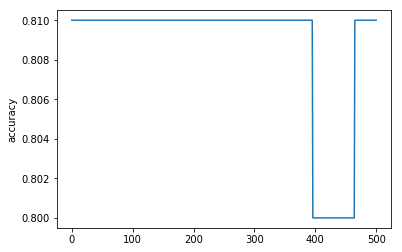

In [20]:
import matplotlib.pyplot as plt
plt.plot(accuracy)
plt.ylabel('accuracy')
plt.show()

In [21]:
R = irl(100, env.PU, env.PD, env.PL, env.PR , 0.035, 0.8, 1, P2)
estimate_reward = np.asarray(R).reshape(10,10)

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+02  2e+03  2e+00  3e+01  1e+00
 1: -6.8861e+02 -1.3034e+03  1e+04  3e+00  4e+01  5e+00
 2: -1.5644e+03 -2.1697e+03  2e+04  3e+00  4e+01  1e+01
 3: -2.4870e+03 -3.0552e+03  3e+04  3e+00  4e+01  2e+01
 4: -1.6709e+04 -1.7093e+04  1e+05  2e+00  3e+01  6e+01
 5: -6.6604e+05 -6.6414e+05  3e+06  2e+00  2e+01  2e+03
 6: -6.6683e+07 -6.6461e+07  3e+08  2e+00  2e+01  2e+05
Certificate of dual infeasibility found.


In [22]:
def heap_map(reward):
    x = np.arange(11)
    y = np.arange(11)
    X, Y = np.meshgrid(x, y)
    plt.pcolor(X, Y, reward, edgecolors='k', linewidths=0.5 )
    plt.colorbar()
    plt.gca().invert_yaxis()

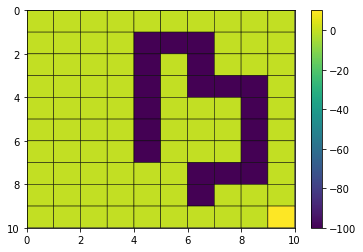

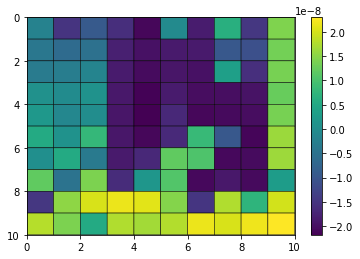

In [23]:
reward_2 = np.zeros((10,10))
reward_2[1,4:7] = -100
reward_2[2:7,4] = -100
reward_2[2:4,6] = -100
reward_2[3,7] = -100
reward_2[3:8,8] = -100
reward_2[7,6:8] = -100
reward_2[8,6] = -100
reward_2[-1,-1] = 10
plt.figure()
heap_map(reward_2)
plt.figure()
heap_map(estimate_reward)

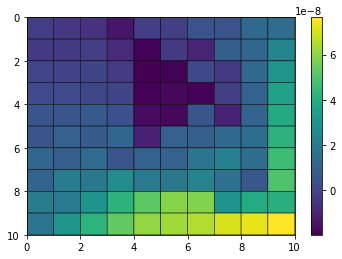

In [24]:
plt.figure()
heap_map(value_iteration(Environment(w=0.1,disc=0.8),R))

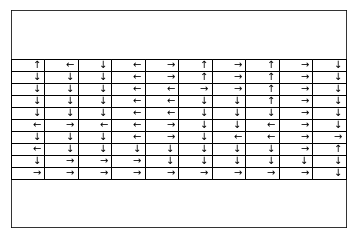

In [25]:
#action 0 is 'up'; action 1 is 'down'; action 2 is 'left'; action 3 is 'right'
arrow_dict = {0:'↑', 1:'↓', 2:'←', 3:'→'}
arrow = optimal_policy(Environment(w=0.1,disc=0.8),R)
arrow = np.asarray(arrow)
arrow_visual = [['↑' for x in range(10)] for y in range(10)]

for i in range(arrow.shape[0]):
    for j in range(arrow.shape[1]):
        arrow_visual[i][j] = arrow_dict[arrow[i][j]]

plt.figure()
tb = plt.table(cellText=arrow_visual, loc=(0,0))
tc = tb.properties()['child_artists']
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.show()